In [ ]:
import pandas as pd
import numpy as np
#import shap
import xgboost as xgb
import joblib

#from xverse.transformer import MonotonicBinning
#from xverse.transformer import WOE

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/amex_default_group.parquet')
df.head(5)

,customer_ID,target,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.933824,0.230769,0.012007,1.005086,0.004509,0.113215,0.0,0.006456,...,2.0,1.0,0.0,5.0,0.0,2.0,0.0,0.0,-1.0,6.0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.899820,7.153846,0.025654,0.991083,0.006246,0.120578,0.0,0.005663,...,2.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,-1.0,6.0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.878454,0.000000,0.004386,0.815677,0.006621,NaN,0.0,0.005493,...,1.0,1.0,0.0,0.0,0.0,2.0,3.0,2.0,-1.0,6.0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.598969,1.538462,0.059876,0.955264,0.005665,0.247750,0.0,0.006423,...,2.0,1.0,0.0,5.0,0.0,2.0,3.0,0.0,-1.0,3.0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.891679,0.000000,0.005941,0.814543,0.004180,0.173102,0.0,0.005088,...,1.0,1.0,0.0,5.0,0.0,2.0,3.0,0.0,1.0,6.0


In [ ]:
cat_vars = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

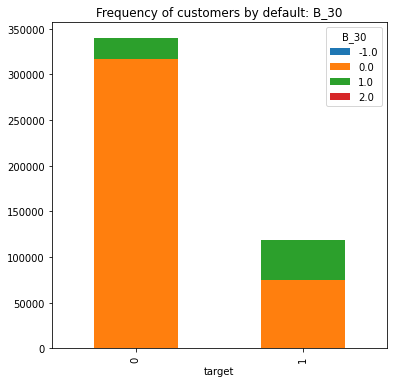

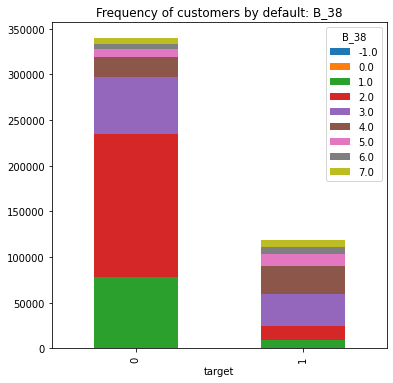

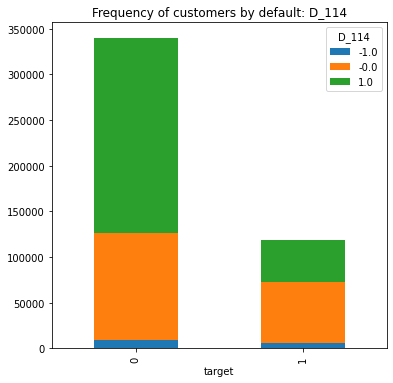

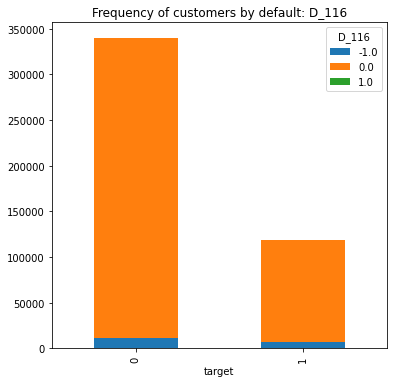

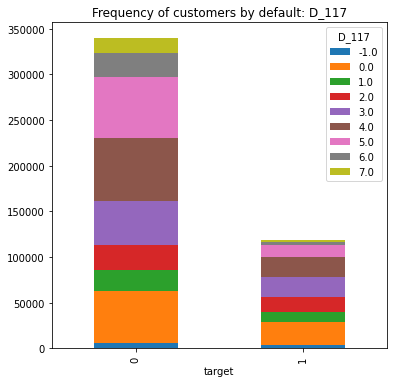

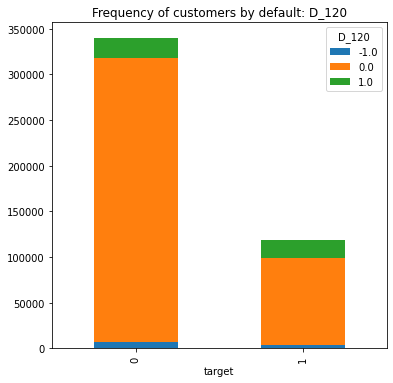

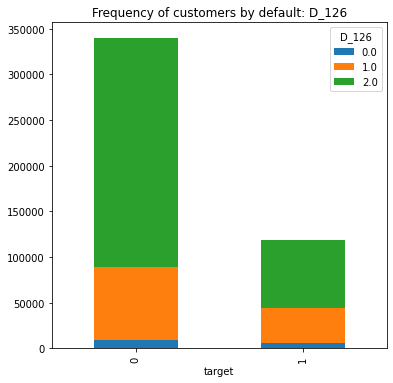

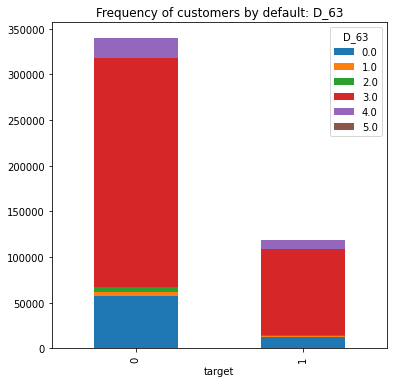

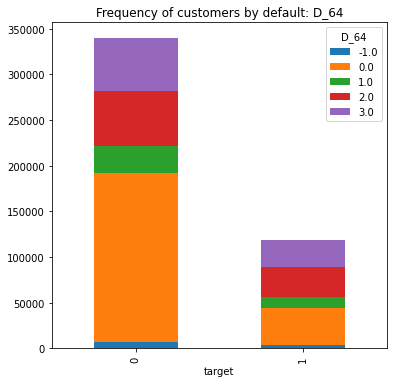

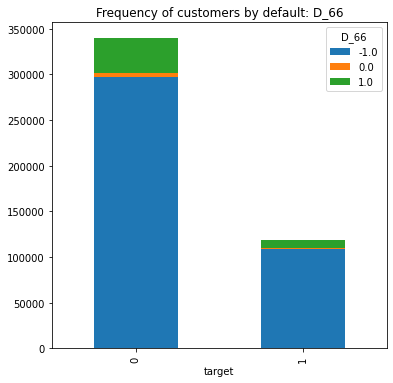

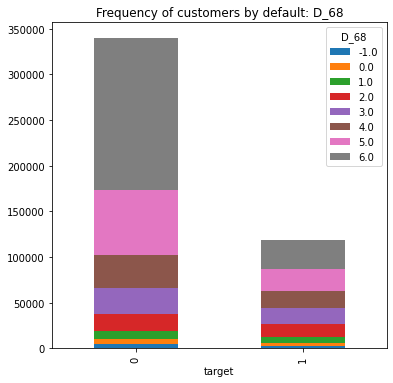

In [ ]:
for i in cat_vars:
  df.groupby(['target', i]).size().unstack().plot(kind='bar', stacked=True, 
              title = 'Frequency of customers by default: {}'.format(i), figsize = (6, 6))
  plt.show();

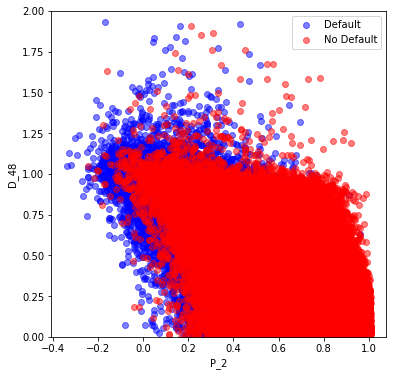

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(x = 'P_2', y = 'D_48', c = 'blue', data = df[df['target'] == 1], label = 'Default', alpha = 0.5)
plt.scatter(x = 'P_2', y = 'D_48', c = 'red', data = df[df['target'] == 0], label = 'No Default', alpha = 0.5)
plt.xlabel('P_2')
plt.ylabel('D_48')
plt.ylim(0,2)
plt.legend()
plt.show();